# Ford GoBike System Data Exploration
## by Ahmed M. Hassan

## Preliminary Wrangling

This dataset includes information about individual rides made in a bike sharing system covering the great San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import math
import calendar
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Assessing

In [2]:
# load the data into dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


The next steps will summarize the effort of assessing and cleaning the data for the anticipated analysis.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

Some columns showing data quality issues of having wrong data type.

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

No duplicated records in the dataframe. Some columns have null values. All columns will be checked for issues

In [7]:
df['duration_sec'].describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

In [8]:
df.loc[df['start_station_id'].isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.6750,2019-02-01 12:28:37.0140,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


In [9]:
df.loc[df['start_station_id'].isnull()]\
[['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']].describe()

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
count,197.000000,197.000000,197.000000,197.000000
mean,37.406599,-121.943401,37.406091,-121.943096
std,0.007634,0.012376,0.008047,0.012859
min,37.380000,-121.980000,37.380000,-121.980000
25%,37.400000,-121.950000,37.400000,-121.950000
50%,37.410000,-121.940000,37.410000,-121.940000
75%,37.410000,-121.930000,37.410000,-121.930000
max,37.420000,-121.920000,37.430000,-121.920000


It seems that missing station id and name belongs to the same station in all entries. The station list will be checked for similar longitude and latitude.

In [10]:
df['start_station_id'].nunique()

329

In [11]:
df['end_station_id'].nunique()

329

Check the start_station list and end station_list for unique station in any of the two lists.

In [12]:
start_station = df['start_station_id'].value_counts().index.sort_values()
end_station = df['end_station_id'].value_counts().index.sort_values()
(start_station != end_station).sum()

0

It seems that the total number of station with station IDs is 329 stations and one station without ID. A new dataframe will be created will station id, latitude and longtitude. Then, the distance between stations in station list and the unkown station will be calculated. The nearest station id will be assigned to the missing station if it is close enough. If there is not a close enough station. A new id will be assigned to the unknown station

In [13]:
df_station = []
for station in start_station:
    latitude = df.loc[df['start_station_id']==station]['start_station_latitude'].iloc[0]
    longitude = df.loc[df['start_station_id']==station]['start_station_longitude'].iloc[0]
    df_station.append({ 'station_id' : station, 'station_latitude' : latitude, 'station_longitude' : longitude})
        

df_station = pd.DataFrame(df_station)
df_station.head()

,station_id,station_latitude,station_longitude
0,3.0,37.786375,-122.404904
1,4.0,37.785881,-122.408915
2,5.0,37.783899,-122.408445
3,6.0,37.804770,-122.403234
4,7.0,37.804562,-122.271738


In [14]:
df_station['distance']=np.sqrt(((df_station['station_latitude']-37.406599)**2)+\
                               ((df_station['station_longitude']-(-121.943401))**2))

In [15]:
df_station.loc[df_station['distance']==df_station['distance'].min()]

,station_id,station_latitude,station_longitude,distance
269,303.0,37.352601,-121.905733,0.065838


Thus, the closest station to the unknow station is station `303`. Thus, all unkown station will be marked with `303` id and station name.

In [16]:
df['bike_id'].nunique()

4646

There are 8265 records with no birthday or gender entry. The first five entries will be checked to decide what to do with them. 

In [17]:
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [18]:
df.loc[df['member_birth_year'].isnull()].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No


It is shown here that the entries without birthday are also without gender. Users with no gender or birthday can be a `Customer` or `Subscriber`. The next line checks that entries without birthday are also without gender

In [19]:
df.loc[df['member_birth_year'].isnull()&df['member_gender'].isnull()].shape[0]

8265

As the number of entries without neither birthday nor gender are the same as the number of entries without birthday. This confirms that the entries without birthday are also without gender. No other information can be used to replace the NaN in these columns. Thus, they will be dropped. But, first let us check the percent of customer and subscribers users in the entries that would be dropped.

In [20]:
df.loc[df['member_birth_year'].isnull()&df['member_gender'].isnull()]['user_type'].value_counts()

Subscriber    5028
Customer      3237
Name: user_type, dtype: int64

Around 60% of the entries that will be dropped are subscribers. 

In [21]:
df['member_birth_year'].describe()

count    175147.000000
mean       1984.806437
std          10.116689
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

The birth year contains values that is too old (1878). A display of all birth year equivalent to age more than 100 year (the data was collected in 2019) will be performed in the next cell.

In [22]:
df.loc[df['member_birth_year']<1919]['member_birth_year'].describe()

count      72.000000
mean     1900.222222
std         2.979849
min      1878.000000
25%      1900.000000
50%      1900.000000
75%      1900.250000
max      1910.000000
Name: member_birth_year, dtype: float64

There are 72 entries with age that exceeds 100 years. They are no clue that these are erroneous entries. They will be left as they are.

### Data Issues Summary
- `start_time` is a string data type not a datetime object
- `end_time` is a string data type not a datetime object
- `start_station_id` has null values
- `start_station_name` has null values
- `end_station_id` has null values
- `end_station_name` has null values
- `member_birth_year` has null values
- `member_gender` has null values
- `start_station_id` should be a string
- `end_station_id` should be a string
- `bike_id` should be a string

### Data Cleaning
- The null values in the `member_gender` and `member_birth_year` will be dropped
- The null entries in start and end station will be filled with the id and name of nearest station based on the latitude and longtiude of station `303`
- Correct the data types as per the above cell.

In [23]:
df = df.loc[~df['member_gender'].isnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             175147 non-null  int64  
 1   start_time               175147 non-null  object 
 2   end_time                 175147 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   175147 non-null  float64
 6   start_station_longitude  175147 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     175147 non-null  float64
 10  end_station_longitude    175147 non-null  float64
 11  bike_id                  175147 non-null  int64  
 12  user_type                175147 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [24]:
station_id = 303
station_name = df.loc[df['start_station_id']==303]['start_station_name'].iloc[0]
for index, row in df.iterrows():
    if math.isnan(row['start_station_id']):
        df.loc[index,'start_station_id']=303
        df.loc[index,'end_station_id']=303
        df.loc[index,'start_station_name']=station_name
        df.loc[index,'end_station_name']=station_name
        
df.info()      

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             175147 non-null  int64  
 1   start_time               175147 non-null  object 
 2   end_time                 175147 non-null  object 
 3   start_station_id         175147 non-null  float64
 4   start_station_name       175147 non-null  object 
 5   start_station_latitude   175147 non-null  float64
 6   start_station_longitude  175147 non-null  float64
 7   end_station_id           175147 non-null  float64
 8   end_station_name         175147 non-null  object 
 9   end_station_latitude     175147 non-null  float64
 10  end_station_longitude    175147 non-null  float64
 11  bike_id                  175147 non-null  int64  
 12  user_type                175147 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [25]:
df['start_station_id']=df['start_station_id'].astype('str')
df['end_station_id']=df['end_station_id'].astype('str')
df['bike_id']=df['bike_id'].astype('str')
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_station_id']=df['start_station_id'].astype('str')
df['end_station_id']=df['end_station_id'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_id         175147 non-null  object        
 4   start_station_name       175147 non-null  object        
 5   start_station_latitude   175147 non-null  float64       
 6   start_station_longitude  175147 non-null  float64       
 7   end_station_id           175147 non-null  object        
 8   end_station_name         175147 non-null  object        
 9   end_station_latitude     175147 non-null  float64       
 10  end_station_longitude    175147 non-null  float64       
 11  bike_id                  175147 non-null  object        
 12  user_type       

In [26]:
# get the min start date and maximum end date to conclude the span of time in the dataframe.
df['start_time'].min(),df['end_time'].max()

(Timestamp('2019-02-01 00:00:20.636000'),
 Timestamp('2019-03-01 08:01:55.975000'))

### What is the structure of your dataset?

> The dataset represents entries of 175147 ride for GoBike bike sharing company in the great San Francisco Bay area. Nearly, all the rides were recorded in the same month (Feburary, 2019). The city has 329 unique stations with 4646 unique bikes. The dataset has the duration, start station, end station, bike id, user type, user age, user gender for every ride. The last column has a data that couldn't be interpreted and the search for a data dictionary for the meaning of this column was not successful 

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest is th trip duration in seconds and the count of the trips.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The effect of the following features in the dataframe on the average trip duration and number of trips
- `user_type`
- `member_gender`<br>

The data in the clean dataframe can be used to derive features by feature engineering to try to find a correlation between the number of trips and duration of trip and these variables. The variables that will be derived are.<br>

- Trip time of the day (using `start_time` column)
- Trip day of the week (using `start_time` column)
- Round trip or not (if the start station is the same as end station)
- Trip distance (using start and end station latitude and longitude)
- Age (using `member_birth_day`)
 

## Feature Engineering
- The `day_time` will rpresent the hour at which the trip start
- The `week_day` will have the day name at which the trip start
- The `age` will have the user age calculated from birthday and the year at which the trip is recorded (which is 2019)
- The `round_trip` will have `True` or `False` if the start and end stations are the same or not repsectively
- The `distance` will have the distance between stations for trips that are not round trips. For round trip will have a nan as entry.
The first three features will be calculated in the following cell. The last two will be calculated in the cell after the following cell.

In [27]:
df['day_time']=df['start_time'].apply(lambda x:x.hour)
df['week_day']=df['start_time'].apply(lambda x:calendar.day_name[x.weekday()])
df['age']=2019-df['member_birth_year']
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_time,week_day,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17,Thursday,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12,Thursday,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17,Thursday,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,23,Thursday,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,23,Thursday,60.0


In [28]:
df['round_trip']=(df['start_station_id']==df['end_station_id'])
df['round_trip'].value_counts()

False    171494
True       3653
Name: round_trip, dtype: int64

The last proposed feature is the distance. Treating the latitude and longitude as X & Y coordinates. We can calculate a distance like parameter to calculate the separation between the start and end station as Euclidean distance. A temporary dataframe is created. the Eculidean distance between start and end stations is calculated. For round trips, this distance is set to zero. Then, the calculated distance column is copied to the initial dataframe

In [29]:
df_temp = df[['start_station_id','start_station_latitude','start_station_longitude','end_station_latitude'\
              ,'end_station_longitude','end_station_id','round_trip']]

df_temp['round_trip_mod'] = df_temp['round_trip'].apply(lambda x:1 if x == False else 0)
df_temp['SeqX']=(df_temp['start_station_latitude']-df_temp['end_station_latitude'])**2
df_temp['SeqY']=(df_temp['start_station_longitude']-df_temp['end_station_longitude'])**2
df_temp['distance']=(np.sqrt(df_temp['SeqX']+df_temp['SeqY']))*(df_temp['round_trip_mod'])
df['distance'] =df_temp['distance']

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_id         175147 non-null  object        
 4   start_station_name       175147 non-null  object        
 5   start_station_latitude   175147 non-null  float64       
 6   start_station_longitude  175147 non-null  float64       
 7   end_station_id           175147 non-null  object        
 8   end_station_name         175147 non-null  object        
 9   end_station_latitude     175147 non-null  float64       
 10  end_station_longitude    175147 non-null  float64       
 11  bike_id                  175147 non-null  object        
 12  user_type       

## Univariate Exploration

In this section, we will first evaluate the main dependent variable which we highlighted `duration_sec`. Also all the independent variables will be investigated which are:
- `user_type`
- `member_gender`
- `day_time`
- `week_day`
- `age`
- `round_trip`
- `distance`

All numerical type variables will be investigated using histograms. All categorical variables will be investigated using bar charts.
### Trip Duration
The trip duration will be explored with a histogram.

In [31]:
np.log10(df['duration_sec'].describe())

count    5.243403
mean     2.847703
std      3.215270
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

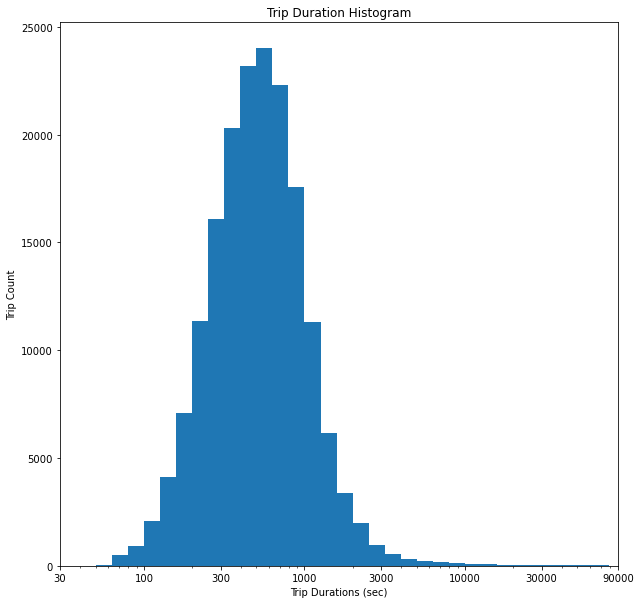

In [32]:
bins = 10**np.arange(1.7,5,0.1)
ticks = [30,100,300,1000,3000,10000,30000,90000]
labels = [30,100,300,1000,3000,10000,30000,90000]
plt.figure(figsize = [10,10])
def_color = sb.color_palette()[0]
plt.hist(df['duration_sec'],bins = bins)
plt.xscale('log')
plt.xlim((10**1.6),(90000))
plt.xticks(ticks,labels)
plt.ylabel('Trip Count')
plt.xlabel('Trip Durations (sec)')
plt.title('Trip Duration Histogram');

The default plot showed the distribution of trip duration is right skewed due to having a very low duration with higher frequency compared with very high duration trips. A modification is introduced to the scale to be log scale. The resultant plot showed that the duration is normally distributed with average trip duration of around 500 seconds with a lot of outliers in the right side. There are trips with very high values of trip duration and very low values also. For sake of this analysis any trips less than 100 seconds or more than 10000 seconds will be removed.

In [33]:
df = df.loc[(df['duration_sec']>=100) & (df['duration_sec']<=10000)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173329 entries, 4 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173329 non-null  int64         
 1   start_time               173329 non-null  datetime64[ns]
 2   end_time                 173329 non-null  datetime64[ns]
 3   start_station_id         173329 non-null  object        
 4   start_station_name       173329 non-null  object        
 5   start_station_latitude   173329 non-null  float64       
 6   start_station_longitude  173329 non-null  float64       
 7   end_station_id           173329 non-null  object        
 8   end_station_name         173329 non-null  object        
 9   end_station_latitude     173329 non-null  float64       
 10  end_station_longitude    173329 non-null  float64       
 11  bike_id                  173329 non-null  object        
 12  user_type       

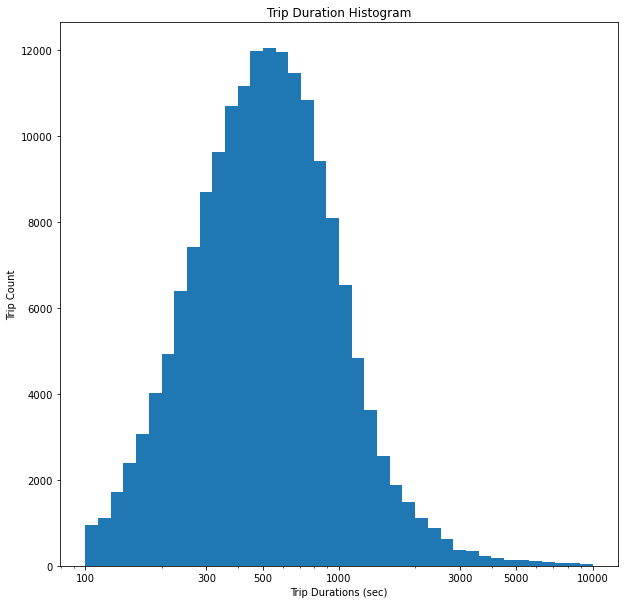

In [34]:
bins = 10**np.arange(2,4.05,0.05)
ticks = [100,300,500,1000,3000,5000,10000]
labels = [100,300,500,1000,3000,5000,10000]
plt.figure(figsize = [10,10])
def_color = sb.color_palette()[0]
plt.hist(df['duration_sec'],bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.ylabel('Trip Count')
plt.xlabel('Trip Durations (sec)')
plt.title('Trip Duration Histogram');

Limiting valid entries to durations within (100 & 10000) seconds, which are considered the reasonable range from my point of view, shows that the distribution of trip duration is normally distributed more or less. The result of exploratory analysis will be limited to this duration interval.

### User Type
It will be explored with count plot.

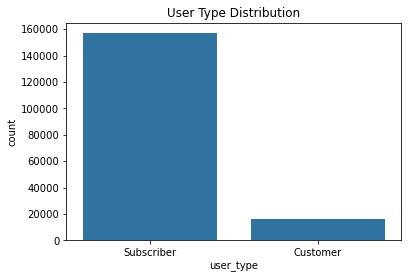

In [35]:
def_color = sb.color_palette()[0]
sb.countplot(df['user_type'],color = def_color)
plt.title('User Type Distribution');

Most of users in the dataset are subscriber.

### User Gender
It will be explored with count plot.

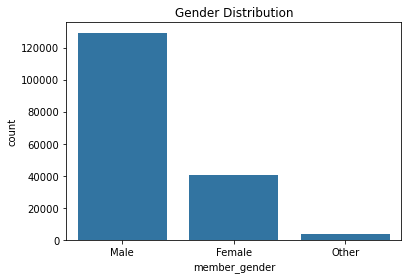

In [36]:
sb.countplot(df['member_gender'],color = def_color)
plt.title('Gender Distribution');

Most of the users are male. Some users didn't specify the gender.

### Day Time
it will be explored as a categorical variable with 24 categories (0 to 23)

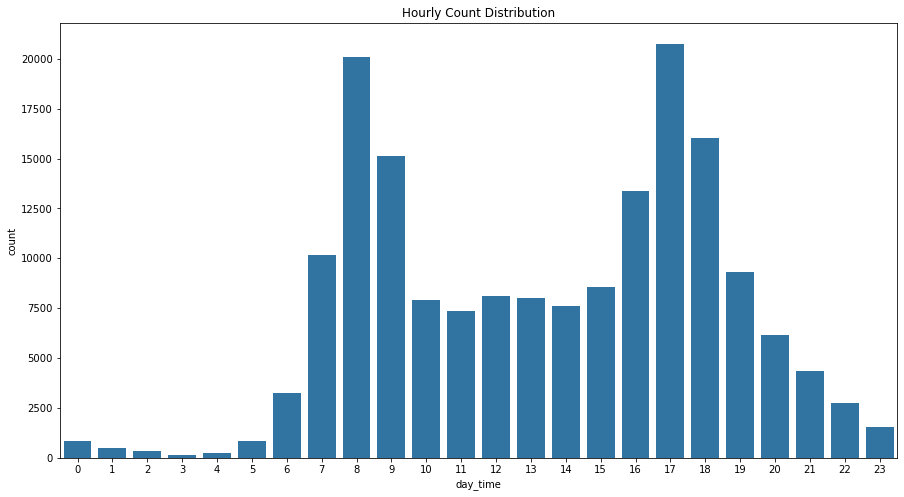

In [37]:
plt.figure(figsize = [15,8])
order = list(np.sort(df['day_time'].unique()))
sb.countplot(df['day_time'],color = def_color,order = order)
plt.title('Hourly Count Distribution');

The distribution has two modes. Two rush hours are represented at 8 am and 5 pm. There are very limited usage of the application during the first 5 hours of the day.

### Day of Week
it will be explored as a categorical variable with 24 categories (0 to 23)

In [38]:
df['week_day'].unique()

array(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday',
       'Friday'], dtype=object)

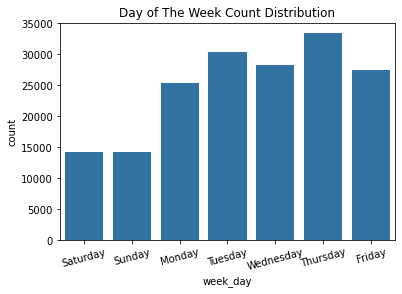

In [39]:
order = ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
sb.countplot(df['week_day'],color = def_color,order = order)
plt.title('Day of The Week Count Distribution')
plt.xticks(rotation = 15);

Nearly equal distribution is observed during the working days. The weekend has equal daily distribution

### Age
It will be explored with histogram

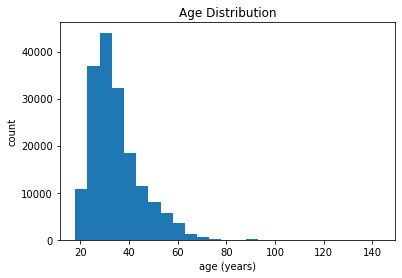

In [40]:
bins = np.arange(df['age'].min(),df['age'].max()+5,5)
plt.hist(df['age'],bins = bins)
plt.xlabel('age (years)')
plt.ylabel('count')
plt.title('Age Distribution');

The age distribution is right skewed. As we limited the duration to logic values only. The same will be followed here. For sake of this analysis the age will be limited to 80 years and below

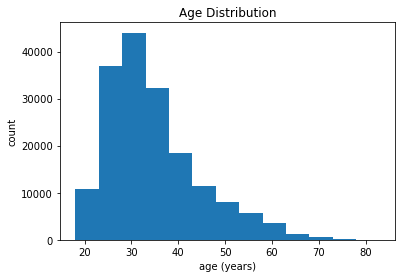

In [41]:
df = df.loc[df['age']<=80]
bins = np.arange(df['age'].min(),df['age'].max()+5,5)
plt.hist(df['age'],bins = bins)
plt.xlabel('age (years)')
plt.ylabel('count')
plt.title('Age Distribution');

### Round Trip
Identifying if the trip is round trip or not. It will be explored with count plot

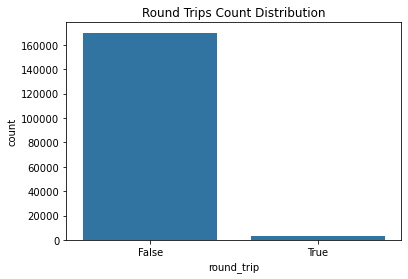

In [42]:
sb.countplot(df['round_trip'],color = def_color)
plt.title('Round Trips Count Distribution');

Nearly, The entire trips are not round trips. Thus, this parameter will no be investigated more. The entries with round trips will be removed.

### Distance
For sake of investigating the distance. A subset of data will be created to remove round trips. This subset will be used to investigate the distance only.

In [43]:
df_distance = df.loc[df['round_trip']==False];

In [44]:
np.log10(df['distance'].describe())

count    5.238463
mean    -1.768382
std     -1.963143
min          -inf
25%     -2.031128
50%     -1.845704
75%     -1.650928
max     -0.155275
Name: distance, dtype: float64

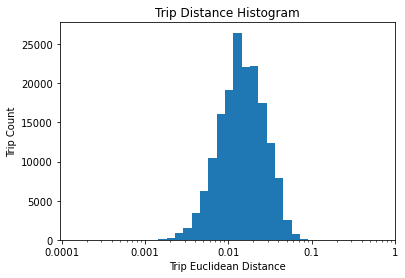

In [45]:
bins = 10**np.arange(-3.84,-0.17,0.1)
ticks = [0.0001,0.001,0.01,0.1,1]
labels = [0.0001,0.001,0.01,0.1,1]
plt.hist(df['distance'],bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.ylabel('Trip Count')
plt.xlabel('Trip Euclidean Distance')
plt.title('Trip Distance Histogram');

This created distance feature based on the coordinates shows a normal distribution with very low and very high values observed away from the mean.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The dependent variable, the trip duration, needed a log scale axis transformation to better show-off the distribution.
- Most of the data represent `subscriber` data.
- Most of the users are males with some users without gender specification.
- Two rush hour identified 8 am and 5 pm 
- The distribution of number of trips per day of the week shows nearly equal count on work days. Weekends has less count but nearly equal count observed comparing Saturday and Sunday.
- The age is right skewed
- Most of the trips are not round trips
- The distance parameter shows normal distribution

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- For trip duartion, the trip time will be limited within (100 & 10000) seconds. It is obvious from the histogram that these are the values with noticable frequency. The less frequent values are with illogically high or low values.
- Age will be limited below or equal 80 years as this is the range with reasonable logic values and with noticable frequency on the histogram. Thus there are not outliers
- All entries with round trips are removed to make use of the distance parameter keeping in mind that the number of trips with round trips being true is limited.


## Bivariate Exploration

In this section the relation between the dependent variable `duration_sec` will be investigated will all other independent variables. The relation with numerical variables will be investigated will scatter plots where a violin plot will be used with categorical variables.

### Duration Vs. Age 

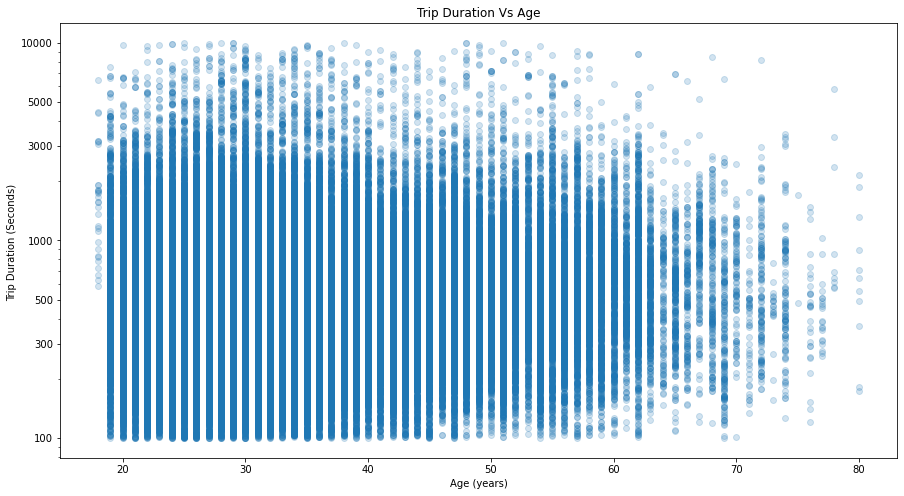

In [46]:
plt.figure(figsize = [15,8])
plt.scatter(data = df, x='age',y='duration_sec',alpha = 0.2)
plt.yscale('log')
ticks = [100,300,500,1000,3000,5000,10000]
labels = [100,300,500,1000,3000,5000,10000]
plt.yticks(ticks,labels)
plt.xlabel('Age (years)')
plt.ylabel('Trip Duration (Seconds) ')
plt.title('Trip Duration Vs Age');

The scatter plot is not showing a strong relationship between the trip time duration and the rider age. In general, there is a negative weak relationship. Also, increasing age make the trip duration more centered around the mean value of 1000 seconds. The extremely short or long trips are limited with increasing age and ,in general, the trip duration decreases with age increasing.

### Duration Vs. Distance 

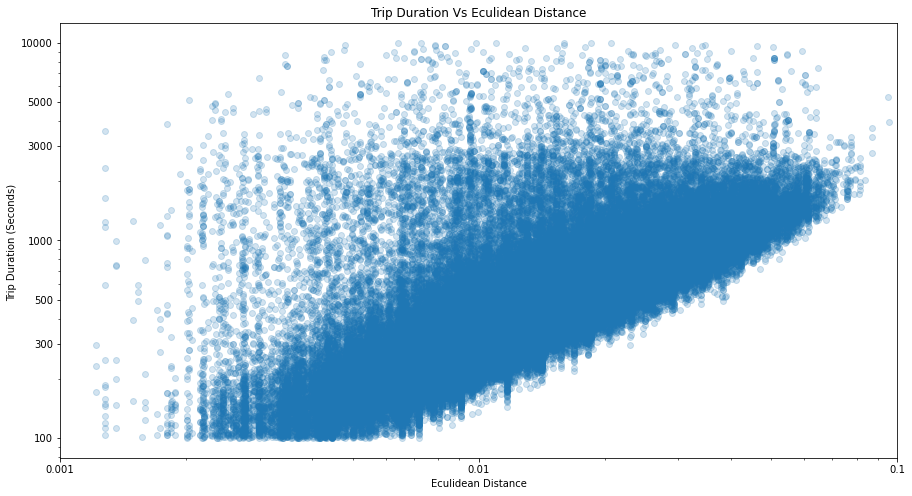

In [47]:
plt.figure(figsize = [15,8])
plt.scatter(data = df, x='distance',y='duration_sec',alpha = 0.2)
plt.yscale('log')
plt.xscale('log')
yticks = [100,300,500,1000,3000,5000,10000]
ylabels = [100,300,500,1000,3000,5000,10000]
xticks = [0.0001,0.001,0.01,0.1,1]
xlabels = [0.0001,0.001,0.01,0.1,1]
plt.yticks(yticks,ylabels)
plt.xticks(xticks,xlabels)
plt.xlabel('Eculidean Distance')
plt.ylabel('Trip Duration (Seconds) ')
plt.title('Trip Duration Vs Eculidean Distance')
plt.xlim(0.001,0.1);

In general, strong positive relationship is observed between the induced Eculidean distance parameter and the trip duration. For a certain distance a span of trip duration is observed. Many factors may contribute to this and this will be further investigated in multivariate exploration.

For the rest of the bivariate exploration, the relation between trip duration and the categorical variables will be investigated using violin plots with inter-quartile ranges plotted.

### Duration Vs. User Type

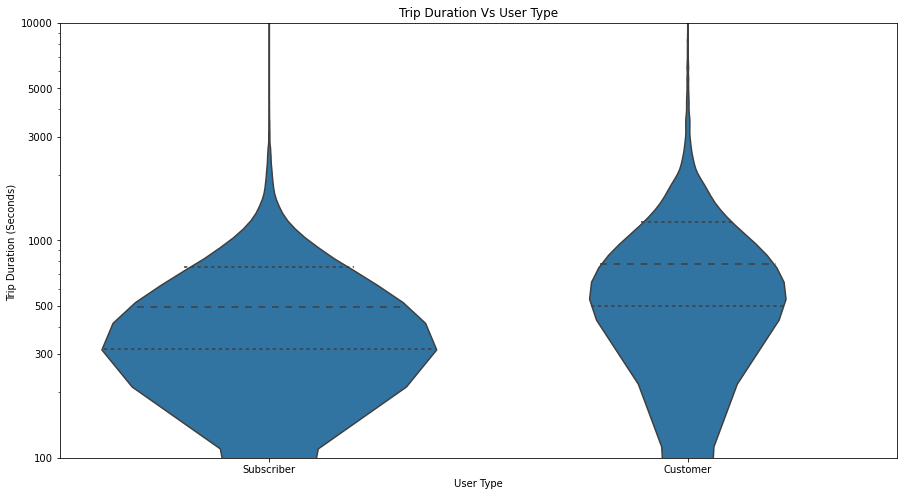

In [48]:
plt.figure(figsize = [15,8])
sb.violinplot(data = df, x ='user_type',y='duration_sec',inner = 'quartile',color = def_color)
plt.yscale('log')
ticks = [100,300,500,1000,3000,5000,10000]
labels = [100,300,500,1000,3000,5000,10000]
plt.yticks(ticks,labels)
plt.ylim(100,10000)
plt.xlabel('User Type')
plt.ylabel('Trip Duration (Seconds) ')
plt.title('Trip Duration Vs User Type');

As the data was cut-off at 100 sec trip duration, the violin plot doesn't show a usual taperred lower age. The average trip duration of customer users is higher than the subscriver users. Thus, being a customer user is related to longer trip durations.

### Duration Vs. Member Type

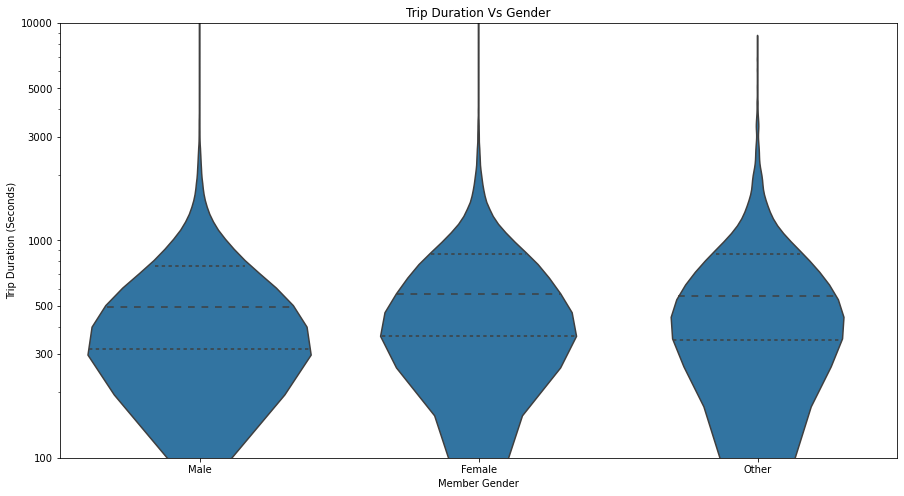

In [49]:
plt.figure(figsize = [15,8])
sb.violinplot(data = df, x ='member_gender',y='duration_sec',inner = 'quartile',color = def_color)
plt.yscale('log')
ticks = [100,300,500,1000,3000,5000,10000]
labels = [100,300,500,1000,3000,5000,10000]
plt.yticks(ticks,labels)
plt.ylim(100,10000)
plt.xlabel('Member Gender')
plt.ylabel('Trip Duration (Seconds)')
plt.title('Trip Duration Vs Gender');

The trip duration distribution per gender shows nearly identical distribution. The male gender has wider distribution, but it is logic considering that most of entries in the dataset is related to male members. The male gender shows average trip duration comparing to the female and the non-gender users. This is explained with the fact that the distribution of male users has more trips with very small duration compared to female users or non-gender users.

### Duration Vs. Week Day

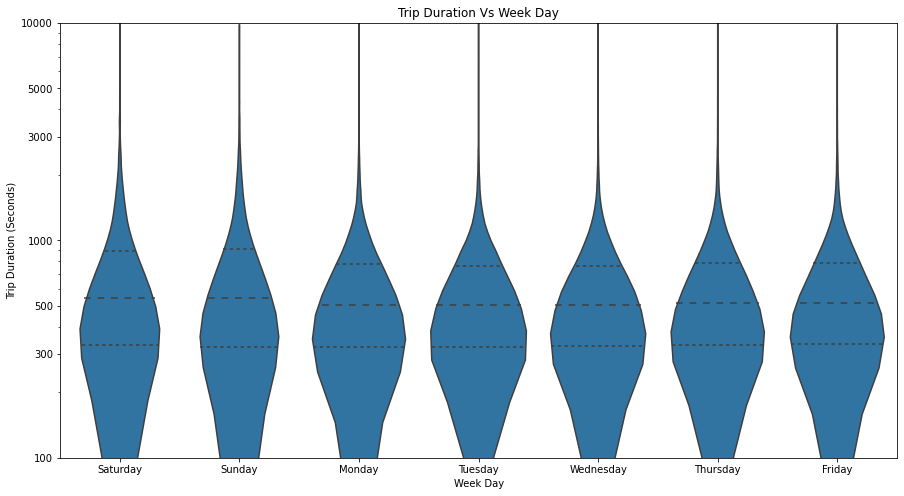

In [50]:
plt.figure(figsize = [15,8])
order = ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
sb.violinplot(data = df, x ='week_day',y='duration_sec',inner = 'quartile',color = def_color,order = order)
plt.yscale('log')
ticks = [100,300,500,1000,3000,5000,10000]
labels = [100,300,500,1000,3000,5000,10000]
plt.yticks(ticks,labels)
plt.ylim(100,10000)
plt.xlabel('Week Day')
plt.ylabel('Trip Duration (Seconds)')
plt.title('Trip Duration Vs Week Day');

The trip time distribution against the weekday shows weekend with slightly higher average compared to working days. The distribution is less in width compared with working days, but agains this can be easily explained from the univariate exploaration showing less trips being performed on weekends compared to working days. The working days shows nearly identical distribution.

### Duration Vs. Day Time

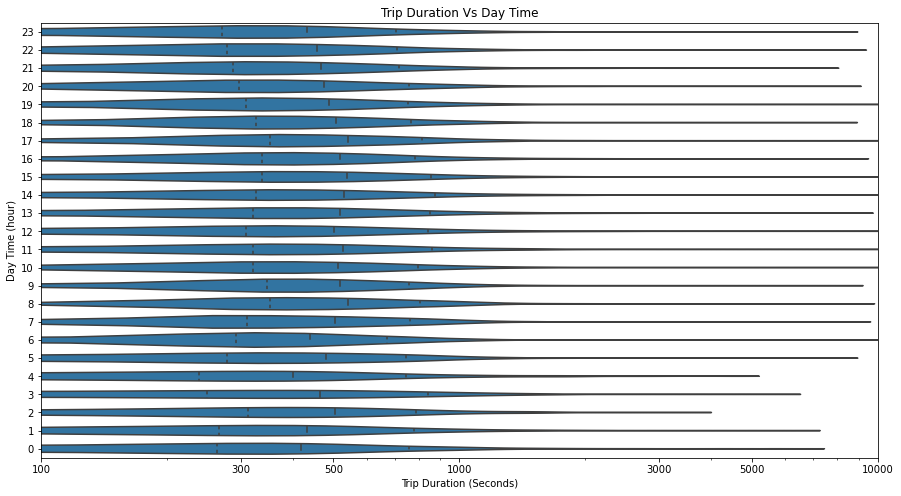

In [51]:
plt.figure(figsize = [15,8])
order = list(np.arange(23,-1,-1))
sb.violinplot(data = df, y ='day_time',x ='duration_sec',inner = 'quartile',color = def_color,order = order,orient='h')
plt.xscale('log')
ticks = [100,300,500,1000,3000,5000,10000]
labels = [100,300,500,1000,3000,5000,10000]
plt.xticks(ticks,labels)
plt.xlim(100,10000)
plt.ylabel('Day Time (hour)')
plt.xlabel('Trip Duration (Seconds)')
plt.title('Trip Duration Vs Day Time');

The same bi-modal distribution is observed. Highest average trip duration is observed at 8 am and the next highes average is at 5 pm. Between the two rush hours, the trip duration is almost identical. The average trip duration is the same. Outside this interval, the average trip duration after 5 pm to mid-night is decreaseing and it continues to decrease till 6 am. After 6 am the average duration starts increasing till reachin the rush-hour @ 8 am.

Further more, the interaction between the categorical variables effect on the number of trips will be investigated using heat maps.

### User Type Vs Gender

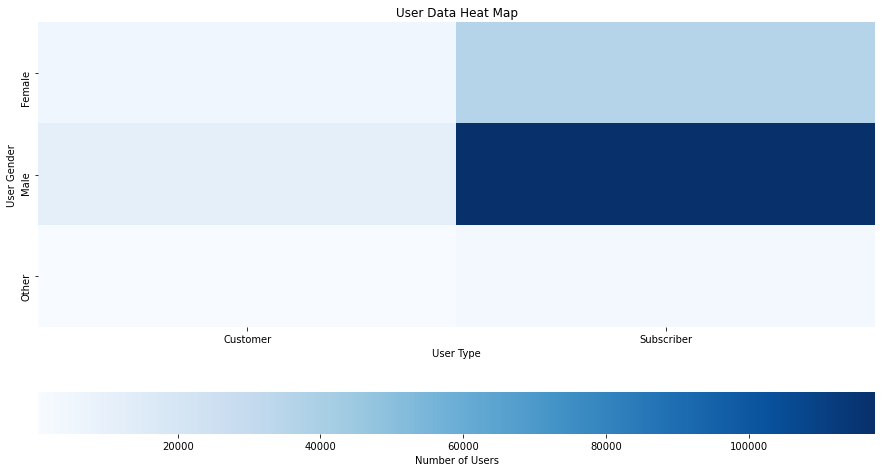

In [52]:
df2 =df.groupby(['member_gender','user_type'],as_index = False)['duration_sec'].count()
df2 = df2.pivot('member_gender','user_type','duration_sec')
plt.figure(figsize = [15,8])
sb.heatmap(df2,cmap ='Blues',cbar_kws = {'label': 'Number of Users','orientation':'horizontal'})
plt.title('User Data Heat Map')
plt.xlabel('User Type')
plt.ylabel('User Gender');

As it is shown here, most of the users are male subscriber users. The same plots will be used to investigate the number of trips per each day of the week per each time of the day

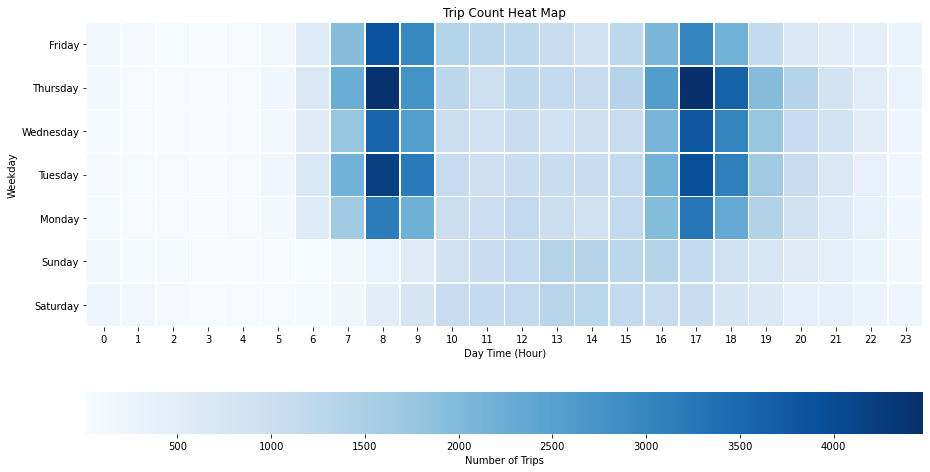

In [53]:
df2 =df.groupby(['day_time','week_day'],as_index = False)['duration_sec'].count()
df2 = df2.pivot('week_day','day_time','duration_sec')
order = ['Friday','Thursday','Wednesday','Tuesday','Monday','Sunday','Saturday']
df2 = df2.reindex(order)
plt.figure(figsize = [15,8])
sb.heatmap(df2,cmap ='Blues',cbar_kws = {'label': 'Number of Trips','orientation':'horizontal'},linewidth = 0.5)
plt.title('Trip Count Heat Map')
plt.xlabel('Day Time (Hour)')
plt.ylabel('Weekday');

This plot shows that on Thursday usually the effect of the rush hours (8 am and 5 pm) is more dominant. On Tuesday, the same effect is observed, specially for 8 am rush hour, but with lesser extent.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- A weak negative relationship was observed between the trip duration and user age, where a strong positive relationship was observed between the trip duration and the eculidean distance parameter.
- Average trip duration of customer user is higher than subscriber
- Average trip duration of male users is less than female or non-gender entries
- Average trip duration of weekends is higher than weekdays
- Average trip duration at 8 am and 5 pm are the highest compared with rest of the day
- Most of the users are male subsrcibers
- The rush hours on Tuesday and Thursday are more dominant

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- The effect of other parameters on the interesting parameters were investigated to limit the scope of the exploration and be more target oriented in the analysis.

## Multivariate Exploration

In multivariate Exploration, the distribution of average trip duration and Euclidean distance with week day and day time will be investigated. The seaborn heatmap will be used. A function to plot the required heatmap will be created to allow investigating the effect of user type and gender on this distribution

### Average Trip Duration Vs Weekday and Day Time

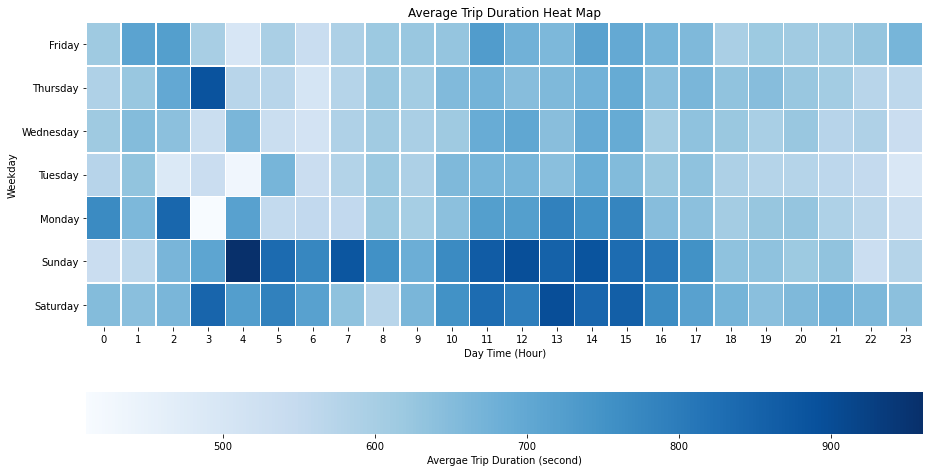

In [54]:
df2 =df.groupby(['day_time','week_day'],as_index = False)['duration_sec'].mean()
df2 = df2.pivot('week_day','day_time','duration_sec')
order = ['Friday','Thursday','Wednesday','Tuesday','Monday','Sunday','Saturday']
df2 = df2.reindex(order)
plt.figure(figsize = [15,8])
sb.heatmap(df2,cmap ='Blues',cbar_kws = {'label': 'Avergae Trip Duration (second)','orientation':'horizontal'},linewidth = 0.5)
plt.title('Average Trip Duration Heat Map')
plt.xlabel('Day Time (Hour)')
plt.ylabel('Weekday');

Despite the identified rush hours of trip demands on working days @ 8 am and 5 pm. The trips with highest average trip duration is observed on weekends. The early morning and late afternoon represents the times at which the increase in average trip duration is observable. This can be justified by the tendency to use bikes for having entertaining rides on weekends. The users tend to have these rides on early morning and late afternoon. The reduced trip duration observed on early morning working days reflect riders commitment to reach their destination on time.

#### Effect of Membership Type on Duration Distribution

In [55]:
df2 =df.groupby(['day_time','week_day','user_type'],as_index = False)['duration_sec'].mean()
max_duration = df2['duration_sec'].max()
min_duration = df2['duration_sec'].min()


def duration_map(apply_filter = False):
    if apply_filter == False:
        df2 = df.copy()
        title = 'Trip Duration Heat Map'
    else: 
        df2 = df.loc[df['user_type']==apply_filter]
        title = 'Trip Duration Heat Map for '+apply_filter+' users'
    df2 =df2.groupby(['day_time','week_day'],as_index = False)['duration_sec'].mean()
    df2 = df2.pivot('week_day','day_time','duration_sec')
    order = ['Friday','Thursday','Wednesday','Tuesday','Monday','Sunday','Saturday']
    df2 = df2.reindex(order)
    sb.heatmap(df2,cmap ='Blues',vmin = min_duration, vmax = max_duration
               ,cbar_kws = {'label': 'Average Trip Duration (seconds)','orientation':'horizontal'},linewidth = 0.5)
    plt.title(title)
    plt.xlabel('Day Time (Hour)')
    plt.ylabel('Weekday');

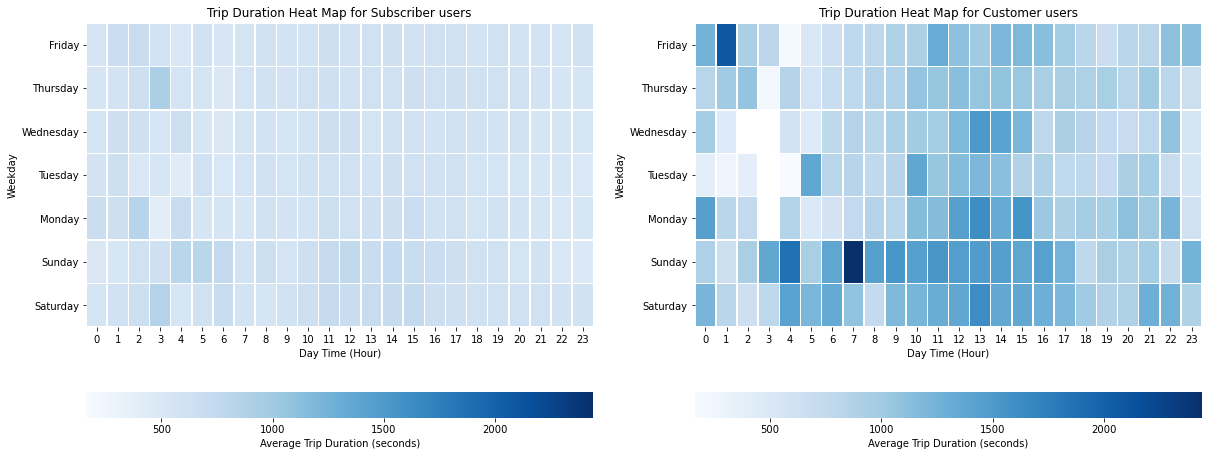

In [56]:
plt.figure(figsize = [20,8])
plt.subplot(1,2,1)
duration_map(apply_filter = 'Subscriber')
plt.subplot(1,2,2)
duration_map(apply_filter = 'Customer');

The above plot using the same color map for both heatmaps. it can be observed that for subscriber users the users behaviour of average ride duration is the same for all weekdays. The change observed on the general heat map is generated more from customer users where longer trips is observed on weekends compared to working days

### Average Euclidean Distance Vs Weekday and Day Time

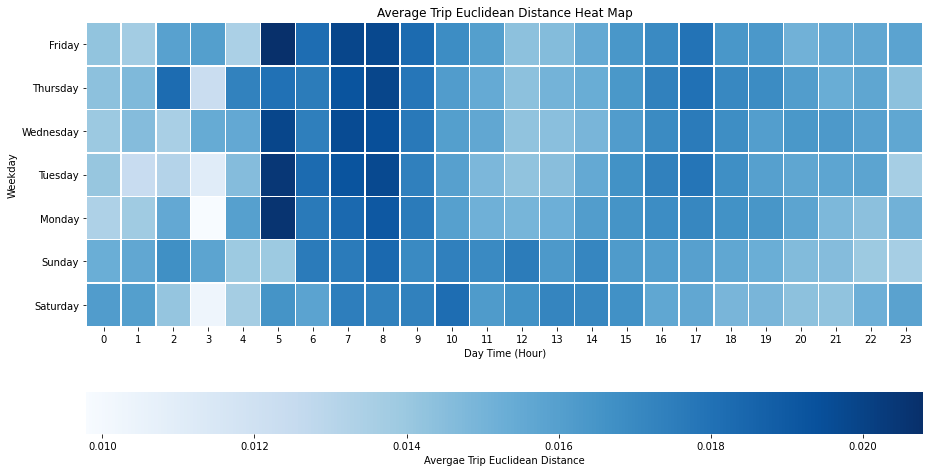

In [57]:
df2 =df.groupby(['day_time','week_day'],as_index = False)['distance'].mean()
df2 = df2.pivot('week_day','day_time','distance')
order = ['Friday','Thursday','Wednesday','Tuesday','Monday','Sunday','Saturday']
df2 = df2.reindex(order)
plt.figure(figsize = [15,8])
sb.heatmap(df2,cmap ='Blues',cbar_kws = {'label': 'Avergae Trip Euclidean Distance','orientation':'horizontal'},linewidth = 0.5)
plt.title('Average Trip Euclidean Distance Heat Map')
plt.xlabel('Day Time (Hour)')
plt.ylabel('Weekday');

The greatest distance is generally observed on working days. The greatest distances is observed on the morning. It can be observed that starting from 5 am the distances separations is the highest and it reducing till the end of the morning rush hour (8 am). It is a logic observation as people who need to cycle for a long distance to reach work or school will have to start their trip earlier to reach on time. The same thing is not noticed on the trip back home as all peaple will leave on same time. An increase in the trip distance at the afternoon rush hour can be explained with trips back from work.

#### Effect of Membership Type on Euclidean Distance Distribution

In [58]:
df2 =df.groupby(['day_time','week_day','user_type'],as_index = False)['distance'].mean()
max_distance = df2['distance'].max()
min_distance = df2['distance'].min()


def distance_map(apply_filter = False):
    if apply_filter == False:
        df2 = df.copy()
        title = 'Trip Eculidean Distance Heat Map'
    else: 
        df2 = df.loc[df['user_type']==apply_filter]
        title = 'Trip Eculidean Distance Heat Map for '+apply_filter+' users'
    df2 =df2.groupby(['day_time','week_day'],as_index = False)['distance'].mean()
    df2 = df2.pivot('week_day','day_time','distance')
    order = ['Friday','Thursday','Wednesday','Tuesday','Monday','Sunday','Saturday']
    df2 = df2.reindex(order)
    sb.heatmap(df2,cmap ='Blues',vmin = min_distance, vmax = max_distance
               ,cbar_kws = {'label': 'Average Trip Eculidean Distance','orientation':'horizontal'},linewidth = 0.5)
    plt.title(title)
    plt.xlabel('Day Time (Hour)')
    plt.ylabel('Weekday');

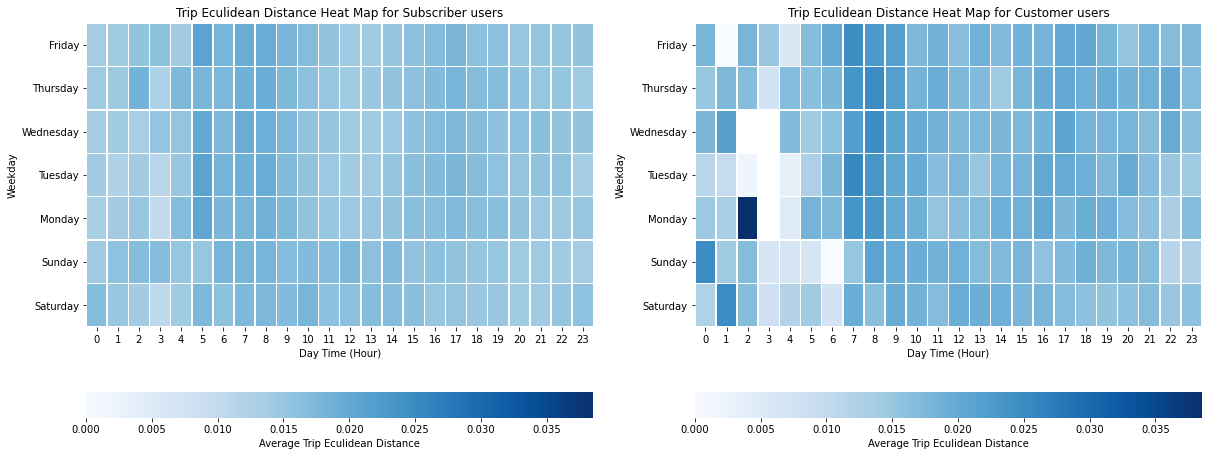

In [59]:
plt.figure(figsize = [20,8])
plt.subplot(1,2,1)
distance_map(apply_filter = 'Subscriber')
plt.subplot(1,2,2)
distance_map(apply_filter = 'Customer');

The same effect is observed for all users. It is more obvious with customer users.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Distribution of average trip duration is nearly constant for subscriber users. The variation of average trip duration is more obvious for customer users
- Distribution of trip distance is the same for customer and subscriber, but it is more obvious for customer users
### Were there any interesting or surprising interactions between features?

- Despite the fact customer users are not the major part of the dataset. The variation of trip distance and duration with weekday and day time is more obvious for them compared with subsriber users
- Subscriber users show subtle change of average trip duration with day and time of trip compared with customer users